In [1]:
from keras.preprocessing import image
import numpy as np

Using TensorFlow backend.


In [2]:
imgpath="C:/Users/Madhu/Desktop/happy.jpg"
test_image=image.load_img(imgpath,target_size =(48,48))

test_image=image.img_to_array(test_image)
test_image.shape

(48, 48, 3)

In [3]:
def rgb2gray(rgb): # turn the image into gray instead of having 3 colors

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

In [4]:
test_image1=rgb2gray(test_image)
test_image1.shape

(48, 48)

In [5]:
#converting to keras shape
def new_img_convert(img):
    img=img.reshape((48,48,1))
    img/=255
    img=np.expand_dims(img, axis=0)
    return img

img=new_img_convert(test_image1)
img.shape

(1, 48, 48, 1)

In [6]:
from keras.models import save_model, load_model

In [7]:
load_model_from_json=open('C:/Users/Madhu/Desktop/KerasModel/CNN/Facial_Expression/object.json','r')
modelFromJson=load_model_from_json.read()

from keras.models import model_from_json
model=model_from_json(modelFromJson)
model.load_weights('C:/Users/Madhu/Desktop/KerasModel/CNN/Facial_Expression/object.h5')

result=model.predict(img)
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
print (label_map)
print(result)

['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
[[ 0.50478077  0.49157721  0.50492299  0.49644771  0.48866352  0.49766067
   0.48521745]]


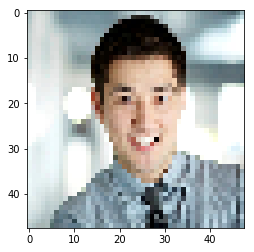

In [8]:
import matplotlib.pyplot as plt
from scipy.misc import toimage
plt.subplot(1,1,1)
plt.imshow(toimage(test_image))
plt.show()